In [2]:
from __future__ import print_function
from __future__ import division

import os, inspect, shutil, csv, pickle, sys
#import cPickle as pickle
import networkx as nx
#import scipy as sp
import numpy as np
import pandas as pd
from scipy.stats import describe
import time
from random import seed, uniform, choice, gauss, randint
from math import fabs
import time
# import PyTables
#import h5py
import tables
import matplotlib.pyplot as plt
##from matplotlib.backends.backend_pdf import PdfPages

In [3]:
Market = nx.DiGraph(kValue=uniform(0,1),kBar=uniform(0,1), agentAge=1)
numAgents = 25
probability_c = .2

In [4]:
Market.add_node(0)      ## , top_node = True    ## tej modified
Market.add_edge(0,0)    ## Tej added this line
in_hierarchy = {0}       ## tej added
for i in range(1, numAgents+1):
    Market.add_node(i, kValue=uniform(0,1), kBar=uniform(0,1),
                         agentAge=1, agentNumber=i)
    Market.add_edge(i,i)

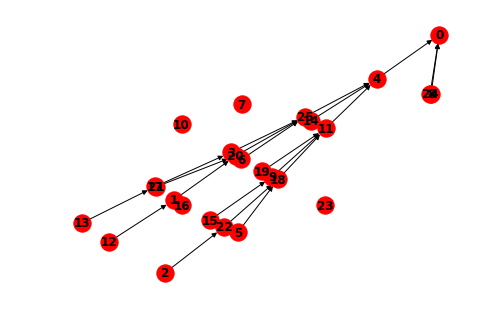

In [10]:
# nx.draw(Market, with_labels=True, font_weight='bold')
pos = nx.draw_kamada_kawai(Market, with_labels=True, font_weight='bold')

In [9]:
iterations = 10
for iteration in range(iterations):
    for n in range(1, len(Market)):
        #only connect if the node does not have a parent
        if (len(Market.adj[n]) == 1):
            
#             # Get all agents first
#             possibleAgents = set(Market.nodes())
#             # Get set of myself and all my in-links
#             inLinksAndMe = list(Market.predecessors(n)) + [n]
#             possibleAgents.difference_update(inLinksAndMe)
#             possibleAgents

            if uniform(0, 1) <= probability_c:
#                 try:
#                     newInLink = choice(list(possibleAgents))
                newInLink = choice(list(in_hierarchy))
#                 print(newInLink)

#                     if newInLink:
                Market.add_edge(n, newInLink)
                in_hierarchy.add(n)
#                 except:
#                     print('exception')

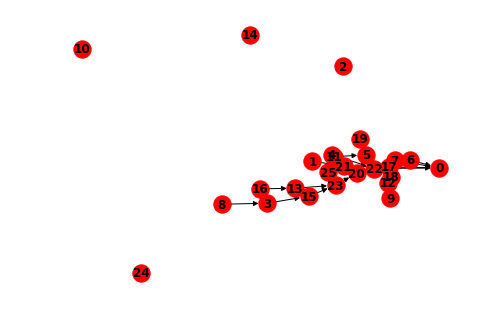

In [6]:
nx.draw(Market, with_labels=True, font_weight='bold')

In [7]:
Market.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25))

In [8]:
nx.algorithms.traversal.depth_first_search.dfs_predecessors(Market,20)

{17: 20, 0: 17}

In [9]:
Market.adj[25]

AtlasView({25: {}, 22: {}})

In [10]:
len(Market.adj[2])

1

In [20]:
list(Market.predecessors(3))

[3, 8]

In [12]:
Market.adj[1]

AtlasView({1: {}, 21: {}})

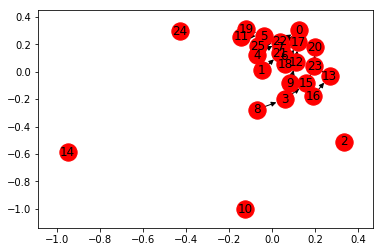

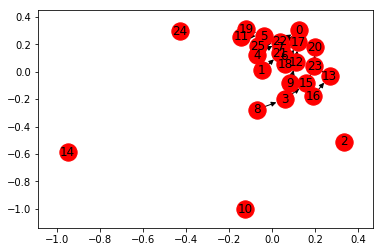

In [13]:
plt.figure(1)
nx.draw_networkx(Market, arrows=True)
plt.figure(1,figsize=(20,100)) 

In [14]:
testset = {1,2,3}

In [15]:
possibleAgents = set(Market.nodes())
# Get set of myself and all my in-links
inLinksAndMe = list(Market.predecessors(8)) + [8]
possibleAgents.difference_update(inLinksAndMe)
print(possibleAgents)

{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}


In [16]:
for n in range(1, len(Market)): print(n)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [21]:
list(Market.predecessors(3))

[3, 8]

ValueError: not enough values to unpack (expected 2, got 1)

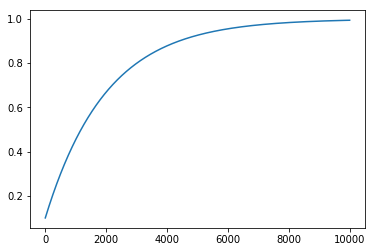

In [43]:
iters = 10000
k = 0.1
kstar = 1
slope = 0.0005
mem = []
for iteration in range(1,iters):
    k = k + slope*(kstar - k)
    mem.append(k)
    
fig, axs = plt.plot(mem)

In [32]:
mem

[0.14500000000000002,
 0.18775000000000003,
 0.22836250000000002,
 0.266944375,
 0.30359715625,
 0.3384172984375,
 0.371496433515625,
 0.40292161183984376,
 0.43277553124785156,
 0.461136754685459,
 0.4880799169511861,
 0.5136759211036268,
 0.5379921250484455,
 0.5610925187960233,
 0.5830378928562221,
 0.603885998213411,
 0.6236916983027405,
 0.6425071133876035,
 0.6603817577182233,
 0.6773626698323121,
 0.6934945363406965,
 0.7088198095236616,
 0.7233788190474786,
 0.7372098780951046,
 0.7503493841903494,
 0.7628319149808319,
 0.7746903192317903,
 0.7859558032702008,
 0.7966580131066907,
 0.8068251124513561,
 0.8164838568287883,
 0.8256596639873489,
 0.8343766807879814,
 0.8426578467485824,
 0.8505249544111533,
 0.8579987066905956,
 0.8650987713560658,
 0.8718438327882625,
 0.8782516411488493,
 0.8843390590914069,
 0.8901221061368365,
 0.8956160008299947,
 0.900835200788495,
 0.9057934407490702,
 0.9105037687116166,
 0.9149785802760358,
 0.9192296512622341,
 0.9232681686991224,
 0.927